In [1]:
using NGSIM
import PyPlot

In [2]:
LOGDIR = Pkg.dir("NGSIM","data")
OUTDIR = joinpath(LOGDIR,"HDF5")
filenames = [
                "i101_trajectories-0750am-0805am",
                "i101_trajectories-0805am-0820am",
                "i101_trajectories-0820am-0835am",
                "i80_trajectories-0400-0415",
                "i80_trajectories-0500-0515",
                "i80_trajectories-0515-0530"
                ]

filename = filenames[1]
raw_path = joinpath(OUTDIR, string(filename, ".hdf5"))
smooth_path = joinpath(OUTDIR, string(filename, "_smoothed.hdf5"))

data_loaders = Dict(
    :raw => DataLoader(raw_path),
    :smooth => DataLoader(smooth_path)
    )

Dict{Symbol,NGSIM.DataLoader} with 2 entries:
  :smooth => NGSIM.DataLoader(HDF5 data file: /local/mnt/workspace/kylebrow/.ju…
  :raw    => NGSIM.DataLoader(HDF5 data file: /local/mnt/workspace/kylebrow/.ju…

In [3]:
idx = 400
for (k, data_loader) in data_loaders
    set_index!(data_loader, idx)
end

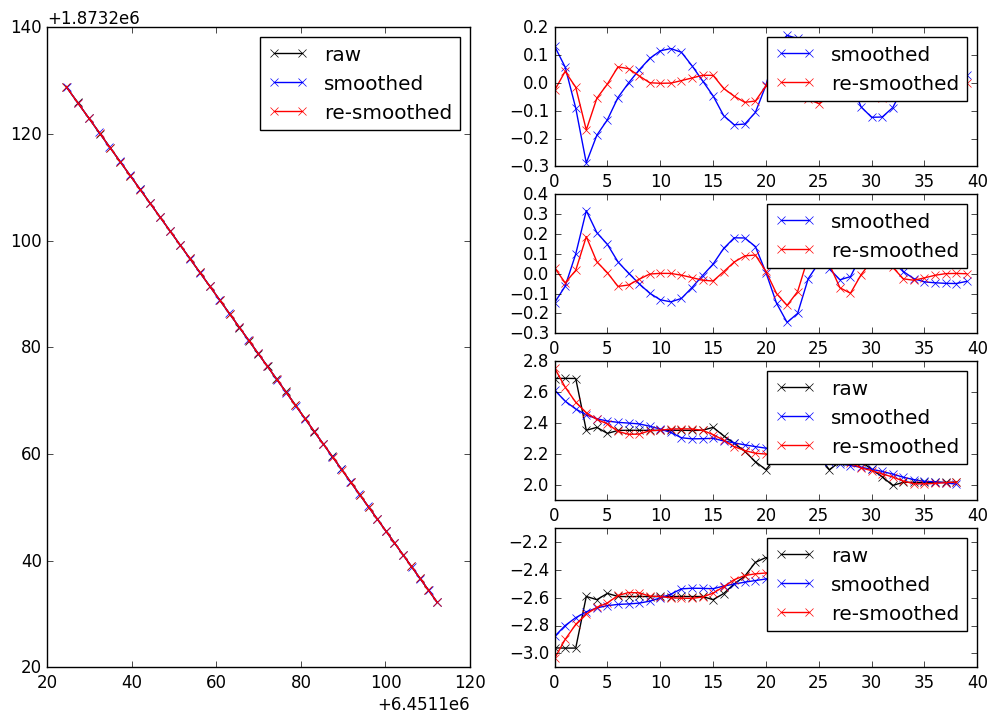

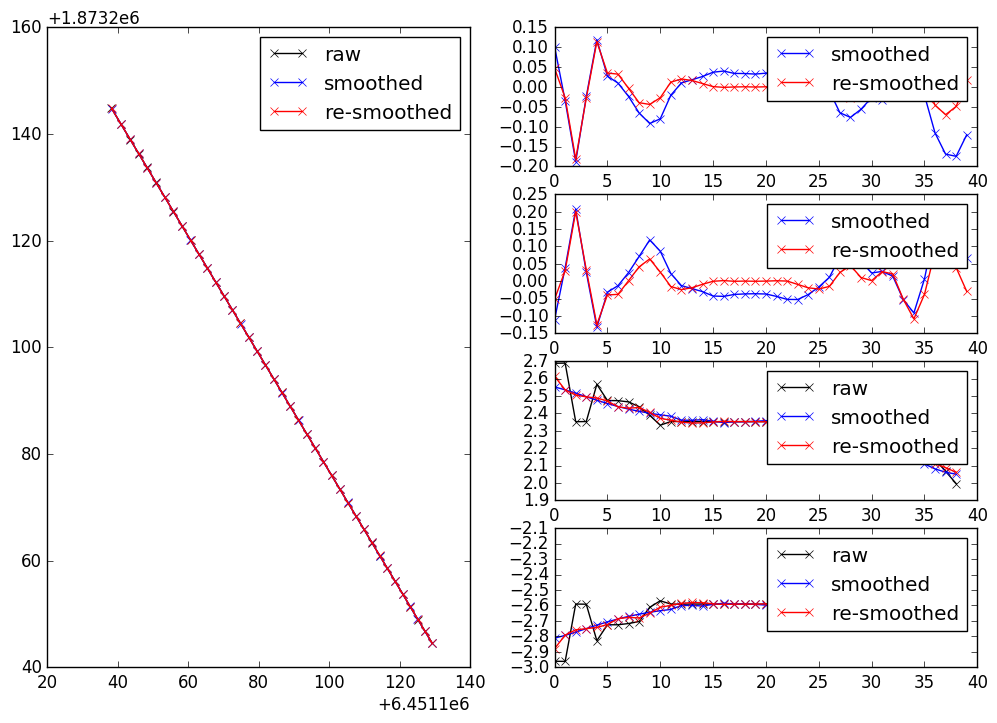

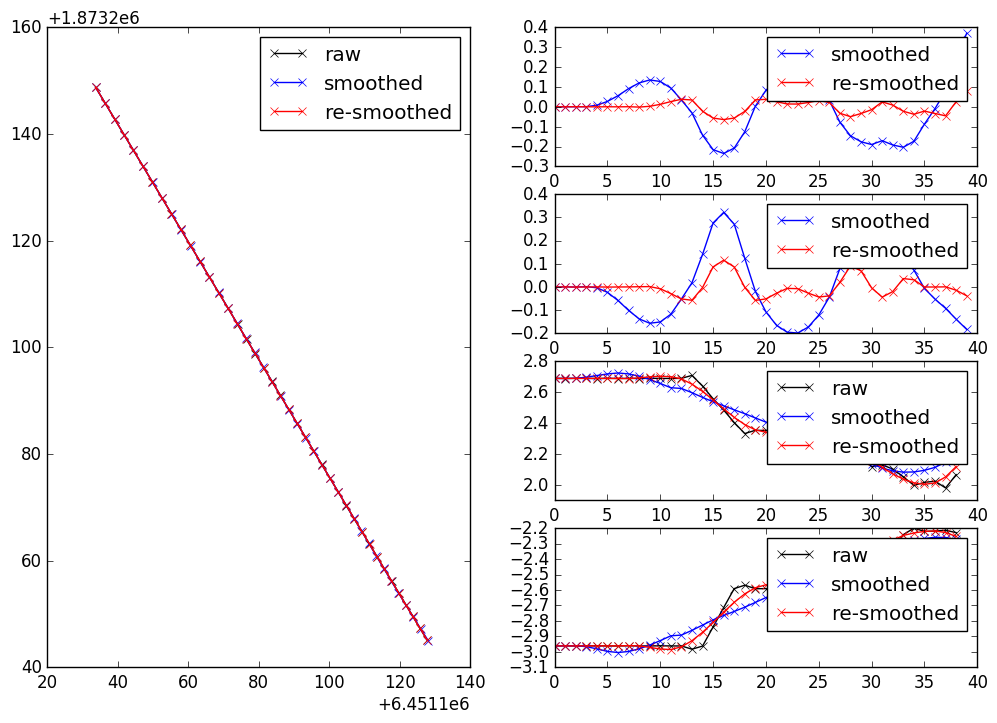

In [50]:
veh_ids = collect(keys(data_loaders[:raw].vehicle_summaries))
veh_ids = rand(veh_ids, 3)
start_idx = 1
stop_idx = 40
smooth = (x,t,σ) -> locally_weighted_regression_smoothing(x,t,t,2;σ=σ,threshold=0.0001)
for id in veh_ids
    PyPlot.figure(figsize=[12,8])
    car1 =  data_loaders[:raw].vehicle_summaries[id]
    car2 = data_loaders[:smooth].vehicle_summaries[id]
    smoothed_X = smooth(car1.X, car1.time_stamps, 2.0)
    smoothed_Y = smooth(car1.Y, car1.time_stamps, 2.0)
    PyPlot.subplot2grid((4,2),(0,0),rowspan=4)
    PyPlot.plot(car1.X[start_idx:stop_idx], car1.Y[start_idx:stop_idx],marker="x",c="black",label="raw")
    PyPlot.plot(car2.X[start_idx:stop_idx], car2.Y[start_idx:stop_idx],marker="x",c="blue",label="smoothed")
    PyPlot.plot(smoothed_X[start_idx:stop_idx], smoothed_Y[start_idx:stop_idx],marker="x",c="red",label="re-smoothed")
    PyPlot.legend()
    PyPlot.subplot2grid((4,2),(0,1))
    PyPlot.plot(car2.X[start_idx:stop_idx] .- car1.X[start_idx:stop_idx],marker="x",c="blue",label="smoothed")
    PyPlot.plot(smoothed_X[start_idx:stop_idx] .- car1.X[start_idx:stop_idx],marker="x",c="red",label="re-smoothed")
    PyPlot.legend()
    PyPlot.subplot2grid((4,2),(1,1))
    PyPlot.plot(car2.Y[start_idx:stop_idx] .- car1.Y[start_idx:stop_idx],marker="x",c="blue",label="smoothed")
    PyPlot.plot(smoothed_Y[start_idx:stop_idx] .- car1.Y[start_idx:stop_idx],marker="x",c="red",label="re-smoothed")
    PyPlot.legend()
    # velocity
    PyPlot.subplot2grid((4,2),(2,1))
    PyPlot.plot(diff(car1.X[start_idx:stop_idx]),marker="x",c="black",label="raw")
    PyPlot.plot(diff(car2.X[start_idx:stop_idx]),marker="x",c="blue",label="smoothed")
    PyPlot.plot(diff(smoothed_X[start_idx:stop_idx]),marker="x",c="red",label="re-smoothed")
    PyPlot.legend()
    PyPlot.subplot2grid((4,2),(3,1))
    PyPlot.plot(diff(car1.Y[start_idx:stop_idx]),marker="x",c="black",label="raw")
    PyPlot.plot(diff(car2.Y[start_idx:stop_idx]),marker="x",c="blue",label="smoothed")
    PyPlot.plot(diff(smoothed_Y[start_idx:stop_idx]),marker="x",c="red",label="re-smoothed")
    PyPlot.legend()
end
# data_loader = data_loaders[:raw]